In [3]:
from importlib import reload
import utils; reload(utils)
from utils import *

Using cuDNN version 5105 on context None
Preallocating 2867/4095 Mb (0.700000) on cuda0
Mapped name None to device cuda0: GeForce GTX 650 (0000:01:00.0)
Using Theano backend.


In [31]:
%matplotlib inline
import os, random
from shutil import copytree
# data_path =  '/Volumes/Backups/data/LUNA16/patches/50x50/'
data_path =  '/Volumes/Backups/data/LUNA16/patches/'

In [5]:
theano.config.dnn.conv.precision = 'float32'
print(theano.config.dnn.conv.precision)

float32


In [6]:
#for i in range(5):
#    patches1 = random.choice(os.listdir("/Volumes/Backups/data/LUNA16/patches/patches1/"))
#    patches0 = random.choice(os.listdir("/Volumes/Backups/data/LUNA16/patches/patches0/"))
#    try:
#        copytree(data_path + 'patches1/' + patches1, '/Volumes/Backups/data/LUNA16/patches/sample2/patches1/' + patches1)
#    except FileExistsError:
#        continue
#    try:
#        copytree(data_path + 'patches0/' + patches0, '/Volumes/Backups/data/LUNA16/patches/sample2/patches0/' + patches0)
#    except FileExistsError:
#        continue

In [7]:
import numpy as np
np.set_printoptions(precision=4,linewidth=100)
import pandas as pd
from vgg16bn import Vgg16BN

In [8]:
model = vgg_ft_bn(2)

/Users/rungsunan/anaconda/envs/py35/lib/python3.5/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [9]:
from vgg16bn import Vgg16BN
model = vgg_ft_bn(2)


/Users/rungsunan/anaconda/envs/py35/lib/python3.5/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_2 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [10]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 3, 224, 224)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
zeropadding2d_14 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 64, 224, 224)  1792        zeropadding2d_14[0][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_14[0][0]           
___________________________________________________________________________________________

In [11]:
model.compile(optimizer=Adam(1e-3),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [12]:
from skimage import color

In [13]:
np.sctypes

{'complex': [numpy.complex64, numpy.complex128, numpy.complex256],
 'float': [numpy.float16, numpy.float32, numpy.float64, numpy.float128],
 'int': [numpy.int8, numpy.int16, numpy.int32, numpy.int64],
 'others': [bool, object, bytes, str, numpy.void],
 'uint': [numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64]}

In [14]:
np_img = np.zeros((1,224,224))

In [15]:
np_img


array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]])

In [34]:
import glob2
from skimage import color
image_labels = []

input_path = data_path + "full/"

ctr = 0
for filename in (os.listdir(input_path)):
    print(filename)
    for image in  glob2.glob(input_path + filename+'/*'):
        ctr += 1
img_array = np.zeros((ctr,3,224,224),dtype=np.float32)
# img_array = np.zeros((ctr,3,50,50),dtype=np.float32)

i=0
#for filename in glob2.glob(data_path+'sample/*/*'):
for filename in (os.listdir(input_path)):
    print(filename)
    for image in  glob2.glob(input_path + filename+'/*'):
        print(image)
        if (filename == 'patches0'):
            image_labels.append(np.int16(0.0))
        else:
            image_labels.append(np.int16(1.0))
        img = color.gray2rgb(255*load_array(image)).astype(np.float32)
        img_array[i] = np.transpose(np.asarray(img,dtype=np.float32),(2,0,1))
        i += 1
#         print(i)
#         if i > 40:
#             break



patches0
patches1
patches0
/Volumes/Backups/data/LUNA16/patches/full/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860_439751_224x224.bc
/Volumes/Backups/data/LUNA16/patches/full/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053_274652_224x224.bc
/Volumes/Backups/data/LUNA16/patches/full/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053_274829_224x224.bc
/Volumes/Backups/data/LUNA16/patches/full/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053_274887_224x224.bc
/Volumes/Backups/data/LUNA16/patches/full/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208_275151_224x224.bc
/Volumes/Backups/data/LUNA16/patches/full/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208_275436_224x224.bc
/Volumes/Backups/data/LUNA16/patches/full/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208_275441_224x224.bc
/Volumes/Backups/data/LUNA16/patche

In [35]:
img_array.shape

(3358, 3, 224, 224)

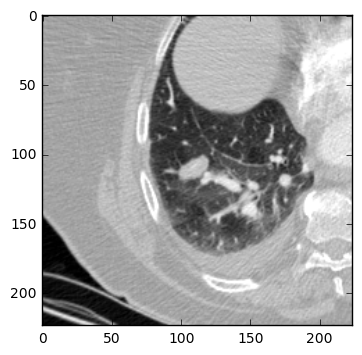

In [52]:
plt.imshow(img_array[3334][0],cmap=plt.cm.gray, vmin=0, vmax=255)

In [53]:
img_array[0,0]

array([[ 186.3321,  184.3286,  191.6143, ...,  167.025 ,  167.7536,  169.0286],
       [ 183.4179,  174.3107,  180.3214, ...,  166.6607,  170.4857,  169.2107],
       [ 185.0571,  181.9607,  188.7   , ...,  172.125 ,  171.9429,  169.0286],
       ..., 
       [ 222.5786,  216.9321,  216.5679, ...,  193.0714,  190.3393,  189.0643],
       [ 231.1393,  225.8571,  226.7679, ...,  184.875 ,  186.3321,  192.525 ],
       [ 230.775 ,  228.4072,  230.4107, ...,  189.2464,  191.25  ,  192.1607]], dtype=float32)

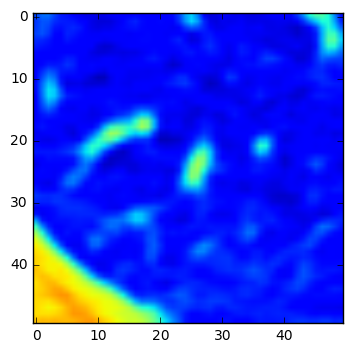

In [25]:
for img in img_array[:10]:
    plt.figure
    plt.imshow(img[0], vmin=0, vmax=1)

In [54]:
img_array[0]

array([[[ 186.3321,  184.3286,  191.6143, ...,  167.025 ,  167.7536,  169.0286],
        [ 183.4179,  174.3107,  180.3214, ...,  166.6607,  170.4857,  169.2107],
        [ 185.0571,  181.9607,  188.7   , ...,  172.125 ,  171.9429,  169.0286],
        ..., 
        [ 222.5786,  216.9321,  216.5679, ...,  193.0714,  190.3393,  189.0643],
        [ 231.1393,  225.8571,  226.7679, ...,  184.875 ,  186.3321,  192.525 ],
        [ 230.775 ,  228.4072,  230.4107, ...,  189.2464,  191.25  ,  192.1607]],

       [[ 186.3321,  184.3286,  191.6143, ...,  167.025 ,  167.7536,  169.0286],
        [ 183.4179,  174.3107,  180.3214, ...,  166.6607,  170.4857,  169.2107],
        [ 185.0571,  181.9607,  188.7   , ...,  172.125 ,  171.9429,  169.0286],
        ..., 
        [ 222.5786,  216.9321,  216.5679, ...,  193.0714,  190.3393,  189.0643],
        [ 231.1393,  225.8571,  226.7679, ...,  184.875 ,  186.3321,  192.525 ],
        [ 230.775 ,  228.4072,  230.4107, ...,  189.2464,  191.25  ,  192.1607]

In [55]:
imgs[0]

NameError: name 'imgs' is not defined

In [2]:
print(type(np_img[0][0][0]))

NameError: name 'np_img' is not defined

In [56]:
 img_array.shape

(3358, 3, 224, 224)

In [57]:
img.shape

(224, 224, 3)

In [173]:
type(img[0][0][0])

numpy.float32

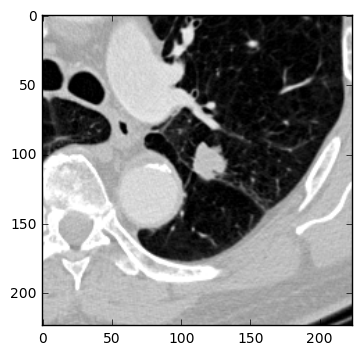

In [58]:
plt.imshow(img_array[2511][0],cmap=plt.cm.gray)

In [175]:
type(img_array[0][0][0][0])

numpy.float32

In [59]:
len(image_labels)

3358

In [60]:
type(image_labels[19])

numpy.int16

In [61]:
ohe_image_labels = to_categorical(np.array(np.float32(image_labels))).astype(np.float32)

In [62]:
sum(ohe_image_labels) # [0,1], [healthy, sick]

array([ 2007.,  1351.], dtype=float32)

In [63]:
type(ohe_image_labels[0][0])

numpy.float32

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
trn_labels, val_labels = train_test_split(ohe_image_labels, test_size=0.2, random_state=42)

In [66]:
trn,val = train_test_split(img_array, test_size=0.2, random_state=42,)

In [67]:
trn.shape

(2686, 3, 224, 224)

In [68]:
type(val[0][0][1][0])

numpy.float32

In [69]:
batch_size = 4

In [70]:
type(val[1][0][1][0])

numpy.float32

In [71]:
# model.fit(trn, 
#           trn_labels, 
#           batch_size=batch_size, 
#           nb_epoch=1, 
#           validation_data=(val, val_labels),verbose = 1)


In [72]:
# model.save_weights(data_path+'results/ft1.h5')

In [73]:
conv_layers,fc_layers = split_at(model, Convolution2D)

In [74]:
conv_layers

In [75]:
conv_model = Sequential(conv_layers)

In [76]:
%time conv_trn_feat = conv_model.predict(trn)

CPU times: user 3min 6s, sys: 8.01 s, total: 3min 14s
Wall time: 7min 3s


In [207]:
conv_trn_feat.shape

(2686, 512, 14, 14)

In [208]:
%time conv_val_feat = conv_model.predict(val)

CPU times: user 1min 23s, sys: 426 ms, total: 1min 23s
Wall time: 1min 23s


In [240]:
conv_val_feat.shape

(672, 512, 14, 14)

In [241]:
save_array(data_path+'results/conv_val_feat.dat', conv_val_feat)

In [210]:
type(conv_trn_feat[0][0][0][0])


numpy.float32

In [243]:
save_array(data_path+'results/conv_trn_feat.dat', conv_trn_feat)

## Model Training

In [244]:
conv_val_feat = load_array(data_path+'results/conv_val_feat.dat')

In [245]:
conv_val_feat.shape

(672, 512, 14, 14)

In [246]:
conv_trn_feat = load_array(data_path+'results/conv_trn_feat.dat')

In [248]:
conv_trn_feat.shape

(2686, 512, 14, 14)

In [325]:
nf=256; p=0.

In [328]:
def get_fc_layers():
    return [
        BatchNormalization(axis=1, input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dropout(p),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(p/2),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(2, activation='softmax'),
    ]


In [329]:
lrg_model = Sequential(get_fc_layers())

GpuArrayException: b'out of memory'

In [ ]:
lrg_model.input_shape, lrg_model.output_shape

In [ ]:
lrg_model.summary()

In [321]:
lrg_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [322]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=1, 
              validation_data=(conv_val_feat, val_labels))

Train on 2686 samples, validate on 672 samples
Epoch 1/1


GpuArrayException: b'out of memory'
Apply node that caused the error: GpuElemwise{mul,no_inplace}(InplaceGpuDimShuffle{x,x}.0, GpuDot22.0)
Toposort index: 485
Inputs types: [GpuArrayType<None>(float32, (True, True)), GpuArrayType<None>(float32, (False, False))]
Inputs shapes: [(1, 1), (100352, 1024)]
Inputs strides: [(4, 4), (4096, 4)]
Inputs values: [gpuarray.array([[ 0.1]], dtype=float32), 'not shown']
Outputs clients: [[GpuElemwise{add,no_inplace}(GpuElemwise{mul,no_inplace}.0, GpuElemwise{mul,no_inplace}.0)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [310]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(conv_val_feat, val_labels))

Train on 2686 samples, validate on 672 samples
Epoch 1/3
2686/2686 [==============================] - 26s - loss: 0.6907 - acc: 0.5711 - val_loss: 0.7968 - val_acc: 0.6176

In [311]:
lrg_model.optimizer.lr = 0.0001

In [312]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=3, 
          validation_data=(conv_val_feat, val_labels))


Train on 2686 samples, validate on 672 samples
Epoch 1/3
2686/2686 [==============================] - 26s - loss: 0.6671 - acc: 0.5983 - val_loss: 0.7526 - val_acc: 0.6190

In [313]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(conv_val_feat, val_labels))

Train on 2686 samples, validate on 672 samples
Epoch 1/3
2686/2686 [==============================] - 26s - loss: 0.6530 - acc: 0.6214 - val_loss: 0.6912 - val_acc: 0.6220

In [ ]:
unresArr198 = load_array('/Volumes/Backups/data/unlabeled_patient_collapsed_images-198x3x224x224.bc')

In [ ]:
unlabeledPredictionvgg = lrg_model.predict(unresArr198, batch_size=8, verbose=1)

In [ ]:
#conv_feat = load_array(data_root + 'results/conv_feat.dat')
#conv_val_feat = load_array(data_root + 'results/conv_val_feat.dat')

In [165]:
theano.config.optimizer_verbose = False
print(theano.config.optimizer_verbose)

False


In [167]:
len(img_array)

3358

In [16]:
!git add cnnvggF.ipynb

In [17]:
!git commit -m "Speed up image loading for loops ver 2"

[master dbd6388] Speed up image loading for loops ver 2
 1 file changed, 31 insertions(+), 30 deletions(-)


In [18]:
!git push origin master

X11 forwarding request failed on channel 0
Counting objects: 3, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 827 bytes | 0 bytes/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To git@github.com:ungsur/luna16.git
   f31bd05..dbd6388  master -> master


In [ ]:
!ls /Volumes/Backups/data/LUNA16/patches/50x50/patches0/ | wc -l